In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

Let's load Iris dataset with load_iris API.

In [2]:
features, labels = load_iris(return_X_y=True, as_frame=True)

Let's split the data into train and test.

In [3]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

Define the decision tree classifier as part of pipeline.

In [5]:
dt_pipeline = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("dt_classifier", DecisionTreeClassifier(max_depth=3, random_state=42))
])

Train the classifier

In [6]:
dt_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])



Now that the classifier is trained, let's evaluate it on the test set with

    Confusion matrix
    Classification report



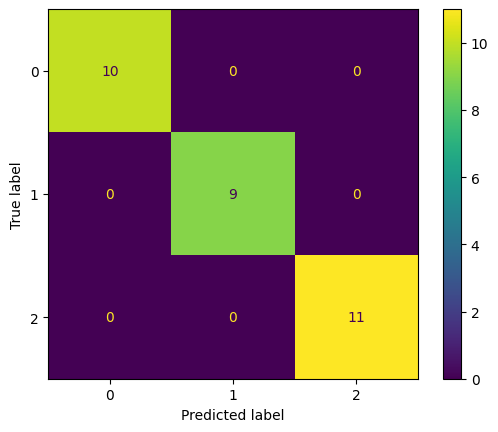

In [7]:
ConfusionMatrixDisplay.from_estimator(dt_pipeline, test_features, test_labels)

In [8]:
print(classification_report(test_labels, dt_pipeline.predict(test_features)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



As a next step let's visualize the trained decision tree model.

In [9]:
data = load_iris()

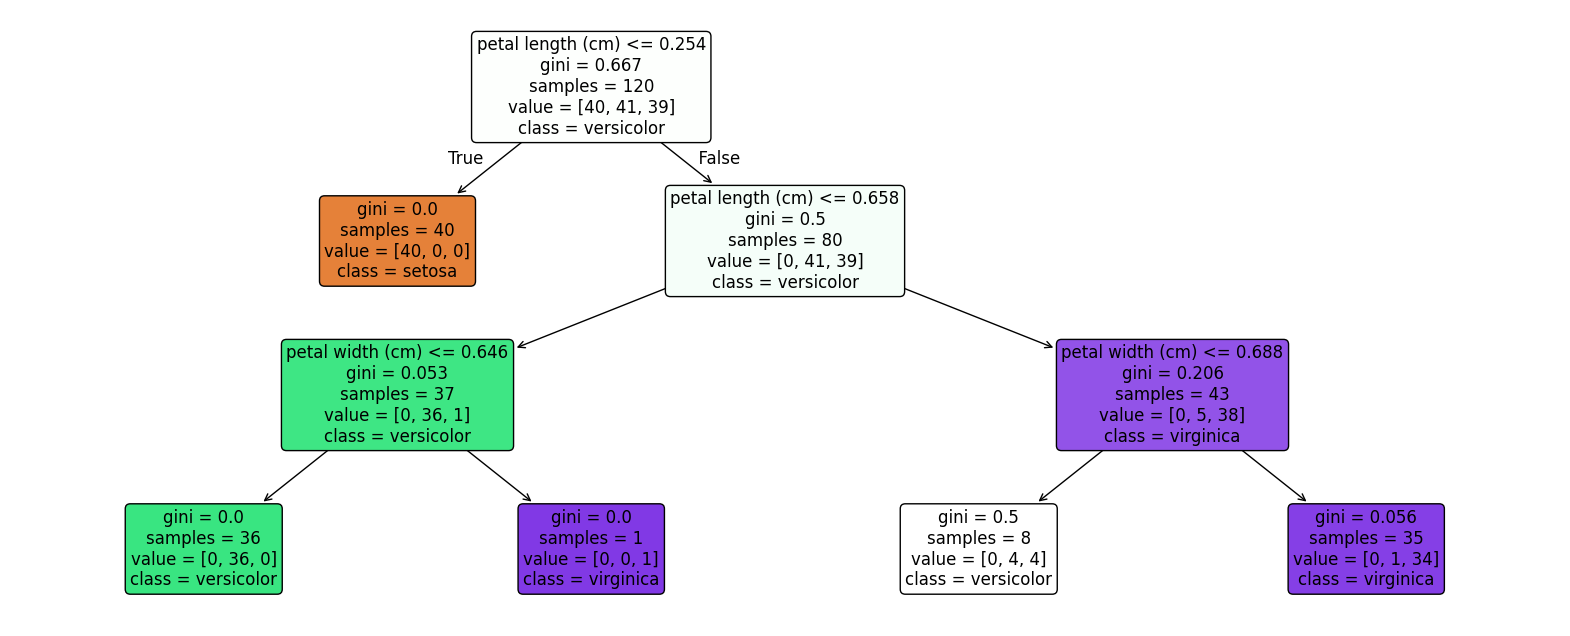

In [10]:
#plt the figure, setting a black background
plt.figure(figsize=(20,8), facecolor ='w')
#create the tree plot
a = tree.plot_tree(dt_pipeline[-1],
                   #use the feature names stored
                   feature_names = features.columns,
                   #use the class names stored
                   class_names = data.target_names,
                   rounded = True,
                   filled = True,
                   fontsize=12)
#show the plot
plt.show()

In [11]:
#export the decision rules
tree_rules = export_text(dt_pipeline[-1],
                        feature_names = list(features.columns))
#print the result
print(tree_rules)

|--- petal length (cm) <= 0.25
|   |--- class: 0
|--- petal length (cm) >  0.25
|   |--- petal length (cm) <= 0.66
|   |   |--- petal width (cm) <= 0.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  0.66
|   |   |--- petal width (cm) <= 0.69
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.69
|   |   |   |--- class: 2



Let's get the feature importance from the trained decision tree model.

In [13]:
#extract importance
importance = pd.DataFrame({'feature': features.columns,
                           'importance': np.round(
                               dt_pipeline[-1].feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace=True)
print(importance)

             feature  importance
2  petal length (cm)       0.935
3   petal width (cm)       0.065
1   sepal width (cm)       0.000
0  sepal length (cm)       0.000




There are two configurable parameters in the tree classifier:

    max_depth
    min_samples_split



In [16]:
hp_grid = [{'dt_classifier__max_depth': [1,2,3,4,5],
            'dt_classifier__min_samples_split': [2,4,6,8,10]}]

gs_clf = GridSearchCV(dt_pipeline, hp_grid, scoring = 'f1_macro')

gs_clf.fit(train_features, train_labels)

print("Best Parameters:")
print()
print(gs_clf.best_params_)
print()
print("Grid scores:")
means = gs_clf.cv_results_["mean_test_score"]
stds = gs_clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, gs_clf.cv_results_['params']):
  print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")

Best Parameters:

{'dt_classifier__max_depth': 4, 'dt_classifier__min_samples_split': 2}

Grid scores:
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 2}
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 4}
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 6}
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 8}
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 10}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 2}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 4}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 6}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 8}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier_

Confusion matrix for the best estimator obtained through the GridSearchCV.

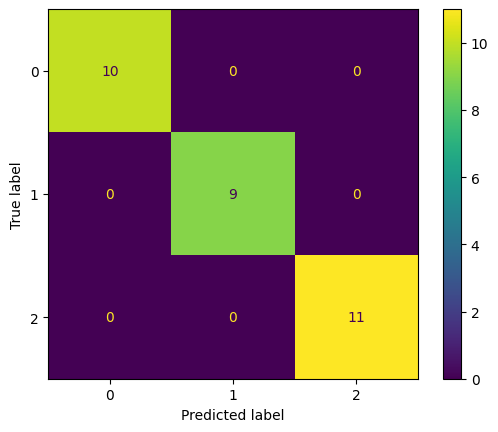

In [17]:
ConfusionMatrixDisplay.from_estimator(gs_clf.best_estimator_, test_features, test_labels)